
انواع روش های نایو بیز را نام برده و فرمول اصلی ریاضیاتی نایو بیز را بنویسید

Gaussian naive Bayes
Multinomial naive Bayes
Bernoulli naive Bayes
Semi-supervised parameter estimation

{\displaystyle p(C_{k}\mid x_{1},\dots ,x_{n})={\frac {1}{Z}}p(C_{k})\prod _{i=1}^{n}p(x_{i}\mid C_{k})}

اگر هدف پیدا کردن محتملترین دسته باشد، به ضریب نرمال‌سازی یعنی {\displaystyle Z}Z نیازی نیست:

{\displaystyle {\hat {y}}={\underset {k\in \{1,\dots ,K\}}{\operatorname {argmax} }}\ p(C_{k})\displaystyle \prod _{i=1}^{n}p(x_{i}\mid C_{k}).}{\displaystyle {\hat {y}}={\underset {k\in \{1,\dots ,K\}}{\operatorname {argmax} }}\ p(C_{k})\displaystyle \prod _{i=1}^{n}p(x_{i}\mid C_{k}).}

را توضیح دهید svm naivebase knn اساس کار و روش انجام مدل های


ر بازشناخت الگو کی-نزدیکترین همسایه (انگلیسی: k-nearest neighbors algorithm) یک متد آمار ناپارامتری است که برای طبقه‌بندی آماری و رگرسیون استفاده می شود. در هر دو حالت کی شامل نزدیک ترین مثال آموزشی در فضای داده ای می باشد و خروجی آن بسته به نوع مورد استفاده در طبقه بندی و رگرسیون متغیر است. در حالت طبقه بندی با توجه به مقدار مشخص شده برای کی، به محاسبه فاصله نقطه ای که میخواهیم برچسب آن را مشخص کنیم با نزدیک ترین نقاط میپردازد و با توجه به تعداد رای حداکثری این نقاط همسایه، در رابطه با برچسب نقطه مورد نظر تصمیم گیری می‌کنیم. برای محاسبه این فاصله میتوان از روش های مختلفی استفاده کرد که یکی از مطرح ترین این روش ها، فاصله اقلیدسی است. در حالت رگرسیون نیز میانگین مقادیر بدست آمده از کی خروجی آن می باشد. از آنجا که محاسبات این الگوریتم بر اساس فاصله است نرمال‌سازی داده‌ها می‌تواند به بهبود عملکرد آن کمک کند.[۱][۲]

دسته‌بندی‌کننده بیز ساده (به انگلیسی: Naive Bayes classifier) در یادگیری ماشین به گروهی از دسته‌بندی‌کننده‌های ساده بر پایه احتمالات گفته می‌شود که با فرض استقلال متغیرهای تصادفی و براساس قضیه بیز ساخته می‌شوند. به‌طور ساده روش بیز روشی برای دسته‌بندی پدیده‌ها، بر پایه احتمال وقوع یا عدم وقوع یک پدیده‌است. این روش از ساده‌ترین الگوریتم‌های پیش‌بینی است که دقت قابل قبولی هم دارد.[۱][۲] دقت آن را می‌توان با استفاده از برآورد چگالی کرنل به صورت قابل توجهی بالا برد. شیوه یادگیری در روش بیز ساده از نوع یادگیری با نظارت است.[۱][۲] این روش در دهه ١٩٦٠ در میان دانشمندان بازیابی اطلاعات توسعه یافت و هنوز هم از روش‌های محبوب در دسته‌بندی اسناد به شمار می‌آید.

بیز ساده فرض را بر استقلال متغیرهای پیش‌بینی می‌گذارد از این رو بیز ساده یا بیز ساده‌لوح خوانده می‌شود.[۲] برای نمونه در مسئله پیش‌بینی یک میوه (این میوه مثلا ممکن است پرتقال باشد) اگر میوه نارنجی و کروی با شعاع حدود ده سانتی‌متر باشد و به شرطی که این احتمالات به درستی از همدیگر مستقل باشند بیز ساده در تشخیص اینکه این میوه پرتقال است یا نه به‌درستی عمل خواهد کرد.

برنامه‌های کاربردی بسیاری هستند که پارامترهای نایو بیز را تخمین می‌زنند، بنابراین افراد بدون سروکار داشتن با تئوری بیز می‌توانند از این امکان به منظور حل مسایل مورد نظر بهره ببرند. با وجود مسائل طراحی و پیش فرض‌هایی که در خصوص روش بیز وجود دارد، این روش برای طبقه‌بندی کردن بیشتر مسایل در جهان واقعی، مناسب است.

ماشین بردار پشتیبانی (Support vector machines - SVMs) یکی از روش‌های یادگیری بانظارت[۱] است که از آن برای طبقه‌بندی[۲] و رگرسیون[۳] استفاده می‌کنند. مبنای کاری دسته‌بندی کنندهٔ SVM دسته‌بندی خطی داده‌ها است و در تقسیم خطی داده‌ها سعی می‌کنیم ابرصفحه ای را انتخاب کنیم که حاشیه اطمینان بیشتری داشته باشد. حل معادله پیدا کردن خط بهینه برای داده‌ها به وسیله روش‌های برنامه سازی غبرخطی که روش‌های شناخته شده‌ای در حل مسائل محدودیت‌دار هستند صورت می‌گیرد. قبل از تقسیمِ خطی برای اینکه ماشین بتواند داده‌های با پیچیدگی بالا را دسته‌بندی کند داده‌ها را به وسیلهٔ تابعِ phi به فضای با ابعاد خیلی بالاتر[۴] می‌بریم. برای اینکه بتوانیم مسئله ابعاد خیلی بالا را با استفاده از این روش‌ها حل کنیم از قضیه دوگانی لاگرانژ[۵] برای تبدیلِ مسئلهٔ مینیمم‌سازی مورد نظر به فرم دوگانی آن که در آن به جای تابع پیچیدهٔ phi که ما را به فضایی با ابعاد بالا می‌برد، تابعِ ساده‌تری به نامِ تابع هسته (کرنل) که ضرب برداری تابع phi است ظاهر می‌شود استفاده می‌کنیم. از توابع هسته مختلفی از جمله هسته‌های نمایی، چندجمله‌ای و سیگموید می‌توان استفاده نمود. یکی از معروفترین خودآموزها مربوط به[۶] است.



در مدل ها چه راهکاری را پیشنهاد میدهید TP TN FP FNبرای پیدا کردن     

Considering you have two lists y_actual and y_pred ( I assume you made a typo error on x_test and x_pred as in your code), you can pass the two lists to this function to parse them

def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

return(TP, FP, TN, FN)
Alternatively, if confusion matrix is a 2x2 matrix (named cm), you can use

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
Share



روی داده های گل زنبق تمام روش هایی را که اموخته اید امتحان کنید

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.linear_model import SGDClassifier,Perceptron,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [17]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [7]:
from sklearn import datasets

iris_data = datasets.load_iris()
iris_df = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
iris_df["class"] = iris_data.target
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [8]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


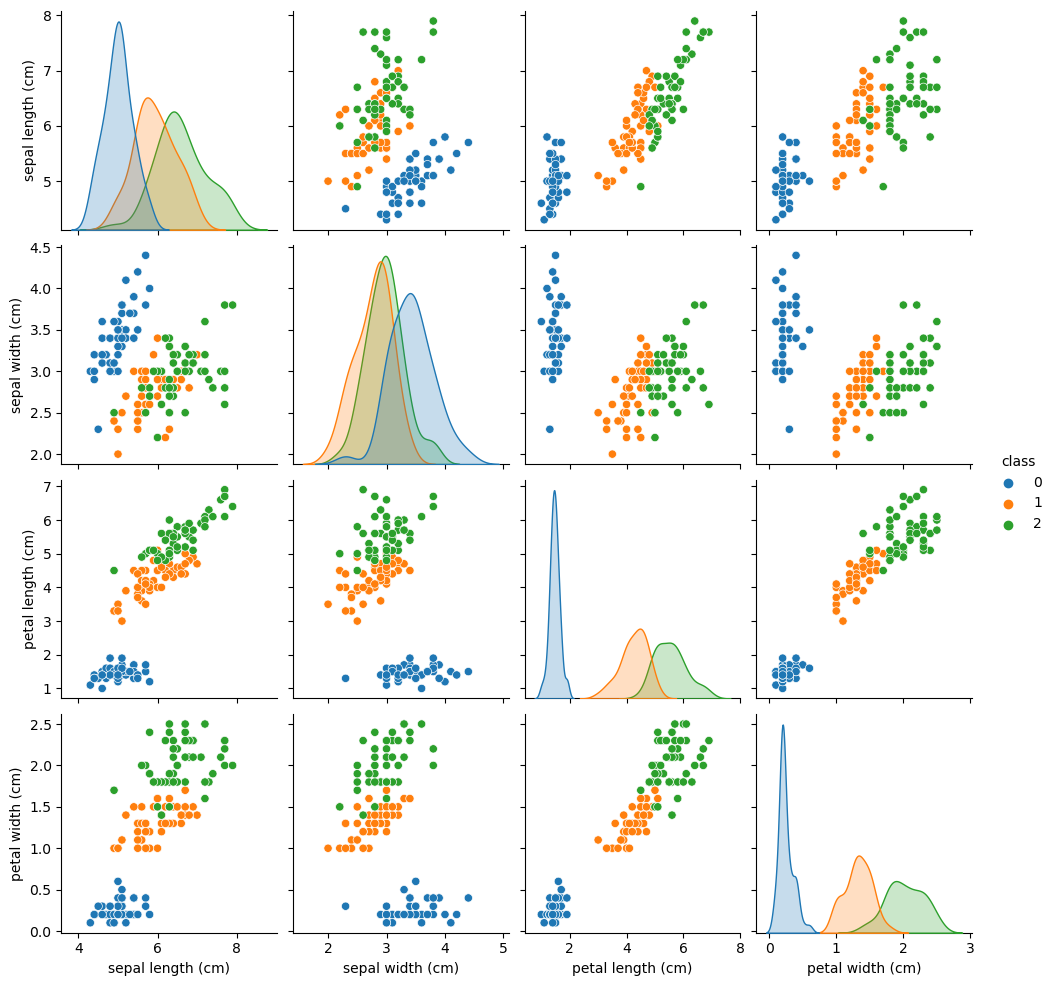

In [9]:
sns.pairplot(iris_df, hue="class",palette="tab10")


In [11]:
X = iris_data.data
y = iris_data.target
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SGD



SGD Classifier_SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



AxesSubplot(0.125,0.11;0.62x0.77)


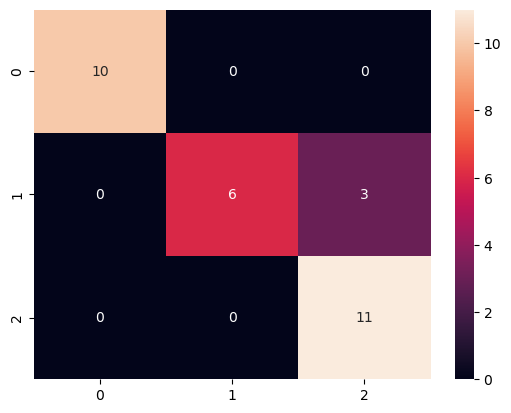

In [18]:
sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(loss="hinge", penalty="l2"))
sgd_classifier.fit(X_train, y_train)
y_predict_sgd= sgd_classifier.predict(X_test)
print("\n")
print("SGD Classifier_SVM")
print(classification_report(y_test, y_predict_sgd))
print("\n")
print(sns.heatmap(confusion_matrix(y_test, y_predict_sgd), annot=True))

# Perceptron



Perceptron
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.33      0.50         9
           2       1.00      1.00      1.00        11

    accuracy                           0.80        30
   macro avg       0.88      0.78      0.76        30
weighted avg       0.88      0.80      0.77        30



AxesSubplot(0.125,0.11;0.62x0.77)


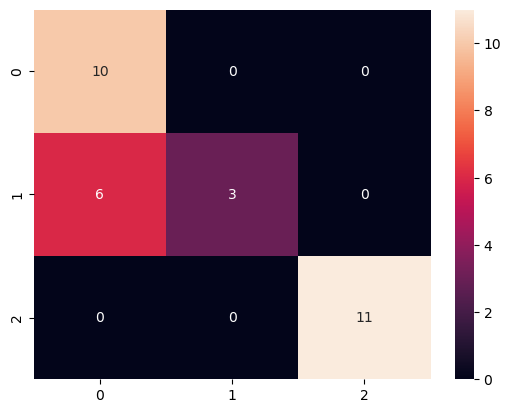

In [19]:
perceptron_classifier = Perceptron()
perceptron_classifier.fit(X_train, y_train)
y_predict_perceptron = perceptron_classifier.predict(X_test)
print("\n")
print("Perceptron")
print(classification_report(y_test, y_predict_perceptron))
print("\n")
print(sns.heatmap(confusion_matrix(y_test, y_predict_perceptron), annot=True))

# LogisticRegression



Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



AxesSubplot(0.125,0.11;0.62x0.77)


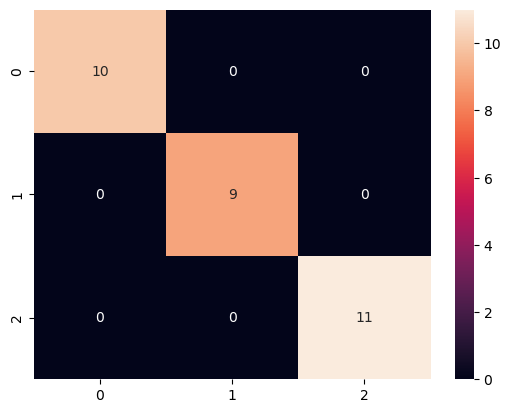

In [20]:
lm_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
lm_classifier.fit(X_train, y_train)
y_predict_LogisticRegression= lm_classifier.predict(X_test)
print("\n")
print("Logistic Regression")
print(classification_report(y_test, y_predict_LogisticRegression))
print("\n")
print(sns.heatmap(confusion_matrix(y_test, y_predict_LogisticRegression), annot=True))

# KNN



KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



AxesSubplot(0.125,0.11;0.62x0.77)


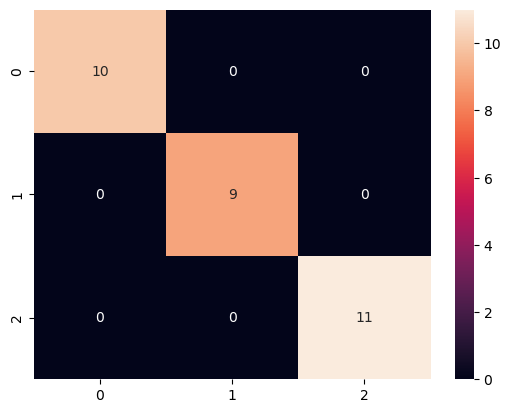

In [21]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict_knn_clf= knn_clf.predict(X_test)
print("\n")
print("KNN")
print(classification_report(y_test, y_predict_knn_clf))
print("\n")
print(sns.heatmap(confusion_matrix(y_test, y_predict_knn_clf), annot=True))

In [22]:
print("confusion_matrix-y_predict_sgd")
print(confusion_matrix(y_test, y_predict_sgd))
print("confusion_matrix_y_predict_perceptron")
print(confusion_matrix(y_test, y_predict_perceptron))
print("confusion_matrix_y_predict_LogisticRegression")
print(confusion_matrix(y_test, y_predict_LogisticRegression))
print("confusion_matrix,y_predict_knn_clf")
print(confusion_matrix(y_test, y_predict_knn_clf))

confusion_matrix-y_predict_sgd
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
confusion_matrix_y_predict_perceptron
[[10  0  0]
 [ 6  3  0]
 [ 0  0 11]]
confusion_matrix_y_predict_LogisticRegression
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
confusion_matrix,y_predict_knn_clf
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [23]:
print("accuracy_score_y_predict_sgd")
print(accuracy_score(y_test, y_predict_sgd))
print("accuracy_score_y_predict_perceptron")
print(accuracy_score(y_test, y_predict_perceptron))
print("accuracy_score_y_predict_LogisticRegression")
print(accuracy_score(y_test, y_predict_LogisticRegression))
print("accuracy_score_y_predict_knn_clf")
print(accuracy_score(y_test, y_predict_knn_clf))

accuracy_score_y_predict_sgd
0.9
accuracy_score_y_predict_perceptron
0.8
accuracy_score_y_predict_LogisticRegression
1.0
accuracy_score_y_predict_knn_clf
1.0


In [24]:
print("SGD Classifier_SVM")
print(classification_report(y_test, y_predict_sgd))
print("\n")
print("Perceptron")
print(classification_report(y_test, y_predict_perceptron))
print("\n")
print("Logistic Regression")
print(classification_report(y_test, y_predict_LogisticRegression))
print("\n")
print("KNN")
print(classification_report(y_test, y_predict_knn_clf))

SGD Classifier_SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



Perceptron
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.33      0.50         9
           2       1.00      1.00      1.00        11

    accuracy                           0.80        30
   macro avg       0.88      0.78      0.76        30
weighted avg       0.88      0.80      0.77        30



Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.

بالایی دارند را پاک کرده و دوباره مدلی که این کار روی آن تاثیر گذار است را امتحان کنید corrolationحال ستونی که 

<!-- در قسمت پایین حذف شد و دقت مدل کاهش  پیدا کرد   -->

In [25]:
iris_df=iris_df.drop(['petal width (cm)'],axis=1)

In [26]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),class
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
...,...,...,...,...
145,6.7,3.0,5.2,2
146,6.3,2.5,5.0,2
147,6.5,3.0,5.2,2
148,6.2,3.4,5.4,2


In [27]:
X = iris_data.data
y = iris_data.target
X_train , X_test, y_train, y_test = train_test_split(X, y, 
                                                     stratify=iris_data.target, test_size=0.2, random_state=42)

# SGD



SGD Classifier_SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



AxesSubplot(0.125,0.11;0.62x0.77)


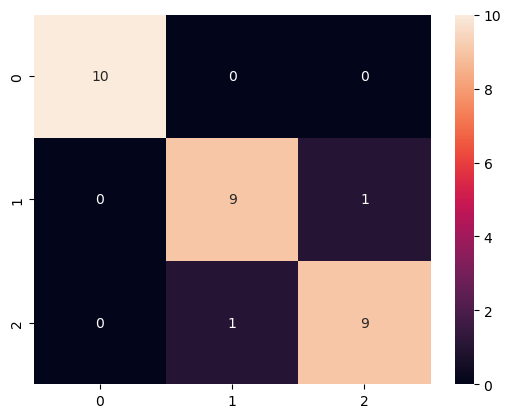

In [28]:
sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(loss="hinge", penalty="l2"))
sgd_classifier.fit(X_train, y_train)
y_predict_sgd= sgd_classifier.predict(X_test)
print("\n")
print("SGD Classifier_SVM")
print(classification_report(y_test, y_predict_sgd))
print("\n")
print(sns.heatmap(confusion_matrix(y_test, y_predict_sgd), annot=True))

# Perceptron



Perceptron
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.40      0.57        10
           2       0.83      1.00      0.91        10

    accuracy                           0.80        30
   macro avg       0.85      0.80      0.77        30
weighted avg       0.85      0.80      0.77        30



AxesSubplot(0.125,0.11;0.62x0.77)


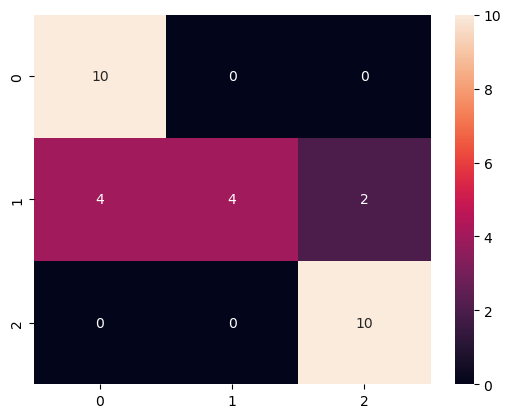

In [29]:
perceptron_classifier = Perceptron()
perceptron_classifier.fit(X_train, y_train)
y_predict_perceptron = perceptron_classifier.predict(X_test)
print("\n")
print("Perceptron")
print(classification_report(y_test, y_predict_perceptron))
print("\n")
print(sns.heatmap(confusion_matrix(y_test, y_predict_perceptron), annot=True))

# LogisticRegression



Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



AxesSubplot(0.125,0.11;0.62x0.77)


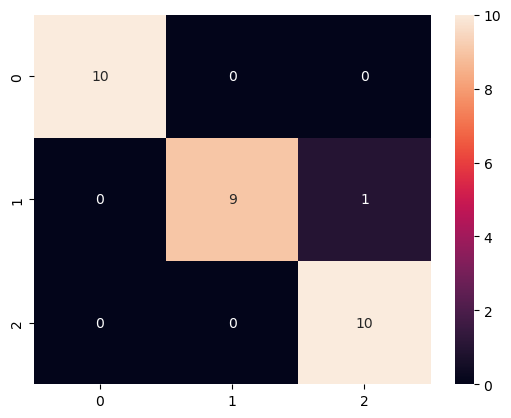

In [30]:
lm_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
lm_classifier.fit(X_train, y_train)
y_predict_LogisticRegression= lm_classifier.predict(X_test)
print("\n")
print("Logistic Regression")
print(classification_report(y_test, y_predict_LogisticRegression))
print("\n")
print(sns.heatmap(confusion_matrix(y_test, y_predict_LogisticRegression), annot=True))

# KNN



KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



AxesSubplot(0.125,0.11;0.62x0.77)


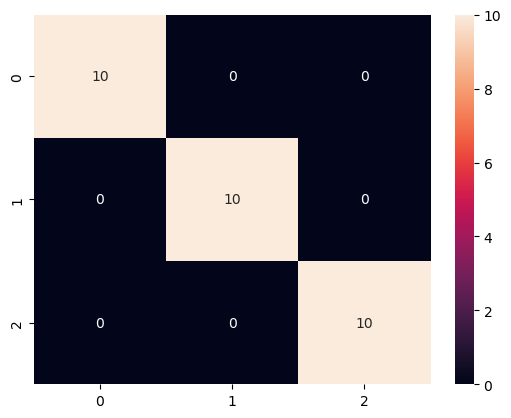

In [31]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict_knn_clf= knn_clf.predict(X_test)
print("\n")
print("KNN")
print(classification_report(y_test, y_predict_knn_clf))
print("\n")
print(sns.heatmap(confusion_matrix(y_test, y_predict_knn_clf), annot=True))

In [32]:
print("confusion_matrix-y_predict_sgd")
print(confusion_matrix(y_test, y_predict_sgd))
print("confusion_matrix_y_predict_perceptron")
print(confusion_matrix(y_test, y_predict_perceptron))
print("confusion_matrix_y_predict_LogisticRegression")
print(confusion_matrix(y_test, y_predict_LogisticRegression))
print("confusion_matrix,y_predict_knn_clf")
print(confusion_matrix(y_test, y_predict_knn_clf))

confusion_matrix-y_predict_sgd
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
confusion_matrix_y_predict_perceptron
[[10  0  0]
 [ 4  4  2]
 [ 0  0 10]]
confusion_matrix_y_predict_LogisticRegression
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
confusion_matrix,y_predict_knn_clf
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [33]:
print("accuracy_score_y_predict_sgd")
print(accuracy_score(y_test, y_predict_sgd))
print("accuracy_score_y_predict_perceptron")
print(accuracy_score(y_test, y_predict_perceptron))
print("accuracy_score_y_predict_LogisticRegression")
print(accuracy_score(y_test, y_predict_LogisticRegression))
print("accuracy_score_y_predict_knn_clf")
print(accuracy_score(y_test, y_predict_knn_clf))

accuracy_score_y_predict_sgd
0.9333333333333333
accuracy_score_y_predict_perceptron
0.8
accuracy_score_y_predict_LogisticRegression
0.9666666666666667
accuracy_score_y_predict_knn_clf
1.0


In [34]:
print("SGD Classifier_SVM")
print(classification_report(y_test, y_predict_sgd))
print("\n")
print("Perceptron")
print(classification_report(y_test, y_predict_perceptron))
print("\n")
print("Logistic Regression")
print(classification_report(y_test, y_predict_LogisticRegression))
print("\n")
print("KNN")
print(classification_report(y_test, y_predict_knn_clf))

SGD Classifier_SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Perceptron
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.40      0.57        10
           2       0.83      1.00      0.91        10

    accuracy                           0.80        30
   macro avg       0.85      0.80      0.77        30
weighted avg       0.85      0.80      0.77        30



Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.

In [35]:
# sgd_classifier = make_pipeline(StandardScaler(),SGDClassifier(loss="hinge", penalty="l2"))
# sgd_classifier.fit(X_train, y_train)
# y_predict_sgd= sgd_classifier.predict(X_test)
# print("\n")
# print("SGD Classifier_SVM")
# print(classification_report(y_test, y_predict_sgd))
# print("\n")
# print(sns.heatmap(confusion_matrix(y_test, y_predict_sgd), annot=True))
# print("confusion_matrix-y_predict_sgd")
# print(confusion_matrix(y_test, y_predict_sgd))
# print("SGD Classifier_SVM")
# print(classification_report(y_test, y_predict_sgd))

### try svm on below dataset and get accuracy more than 95 

In [36]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [37]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [38]:
wine = load_wine(as_frame=True)
wine_df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
wine_df["class"] = wine.target
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [39]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [40]:
X = wine.data
y = wine.target
X_train , X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

In [49]:
svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=1000,kernel='rbf',degree=10,gamma=10))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.3888888888888889

In [45]:
svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=5,kernel='poly',degree=2,gamma=0.01))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.6666666666666666

In [47]:
svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=1000,kernel='poly',degree=10,gamma=10))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.75

In [51]:
svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=5,kernel='linear',degree=2,gamma=0.01))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.9722222222222222

In [43]:
svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=1000,kernel='linear',degree=1,gamma=0.0001))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.9722222222222222